<a href="https://colab.research.google.com/github/tienvtt/Stock-Analysis-and-Prediction-Applying-Machine-Learning/blob/master/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**:
- Use mathematical and statistical techniques and to analyze patterns, trends
- Utilize machine learning algorithm to predict stock price.
- Compare stocks belonged to Financial Services: SSI, VND, VCI, VIX, HCM for data-driven decisions.

# **Install library and load data**

In [76]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

fatal: destination path 'vnquant' already exists and is not an empty directory.
/content/vnquant/vnquant/vnquant/vnquant
python3: can't open file '/content/vnquant/vnquant/vnquant/vnquant/setup.py': [Errno 2] No such file or directory


In [77]:
import pandas as pd
import vnquant.data as vnq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Define stock symbols
symbols = ["SHB", "VHM", "FPT", "HPG","HCM"]

# Store DataFrames for each stock
stock_data = {}

for symbol in symbols:
    loader = vnq.DataLoader(
        symbols=symbol,
        start="2023-01-01",
        end="2025-03-21",
        minimal=True,
        data_source="cafe"
    )

    # Download and store DataFrame
    df = pd.DataFrame(loader.download())

    df.columns = df.columns.droplevel(level=1)

    stock_data[symbol] = df

    # Print first few rows for verification
    print(f"Data for {symbol}:")
    print(df.head(), "\n")


# Assign DataFrames to individual variables
df_shb = stock_data["SHB"]
df_vhm = stock_data["VHM"]
df_fpt = stock_data["FPT"]
df_hpg = stock_data["HPG"]
df_hcm = stock_data["HCM"]

[2025-03-26 03:16:30] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['SHB'] from CAFEF, start: 01/01/2023, end: 21/03/2025!
[2025-03-26 03:16:34] - Assitant - INFO      - download_one - line 94 - data SHB from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:16:34] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VHM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for SHB:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  SHB  12.45  12.30  12.40  12.30   12.30     9060000.0   
2025-03-21  SHB  12.05  11.65  11.85  11.75   11.75    74606600.0   
2025-03-20  SHB  11.90  11.50  11.65  11.75   11.75    79891400.0   
2025-03-19  SHB  11.80  11.40  11.50  11.65   11.65    68781700.0   
2025-03-18  SHB  11.70  11.10  11.25  11.60   11.60    71982900.0   

Attributes   value_match  
date                      
2025-03-26  1.121650e+11  
2025-03-21  8.834230e+11  
2025-03-20  9.347830e+11  
2025-03-19  8.011410e+11  
2025-03-18  8.175310e+11   



[2025-03-26 03:16:36] - Assitant - INFO      - download_one - line 94 - data VHM from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:16:36] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['FPT'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for VHM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  VHM  52.20  50.90  51.80  51.30   51.30     1875300.0   
2025-03-21  VHM  48.40  47.10  47.10  48.25   48.25    13695700.0   
2025-03-20  VHM  48.20  46.95  47.35  47.35   47.35    13458400.0   
2025-03-19  VHM  47.90  46.25  46.80  47.35   47.35    13442500.0   
2025-03-18  VHM  48.75  46.80  47.60  47.30   47.30    12239500.0   

Attributes   value_match  
date                      
2025-03-26  9.704800e+10  
2025-03-21  6.590010e+11  
2025-03-20  6.384460e+11  
2025-03-19  6.318710e+11  
2025-03-18  5.820090e+11   



[2025-03-26 03:16:38] - Assitant - INFO      - download_one - line 94 - data FPT from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:16:38] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HPG'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for FPT:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  FPT  126.5  124.9  126.5  125.5   125.5     1829800.0   
2025-03-21  FPT  129.0  125.0  125.0  128.0   128.0     6424800.0   
2025-03-20  FPT  126.8  124.5  124.6  125.0   125.0     8203400.0   
2025-03-19  FPT  130.6  123.5  130.1  124.6   124.6    18128400.0   
2025-03-18  FPT  132.2  130.0  130.1  130.0   130.0     5508500.0   

Attributes   value_match  
date                      
2025-03-26  2.293170e+11  
2025-03-21  8.202040e+11  
2025-03-20  1.027201e+12  
2025-03-19  2.288715e+12  
2025-03-18  7.197290e+11   



[2025-03-26 03:16:40] - Assitant - INFO      - download_one - line 94 - data HPG from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:16:40] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HCM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for HPG:
Attributes code   high    low  open  close  adjust  volume_match   value_match
date                                                                          
2025-03-26  HPG  27.35  27.15  27.2  27.35   27.35     3624700.0  9.889500e+10
2025-03-21  HPG  27.25  27.05  27.1  27.15   27.15    18912200.0  5.135380e+11
2025-03-20  HPG  27.45  27.05  27.3  27.15   27.15    25022500.0  6.794540e+11
2025-03-19  HPG  27.60  27.10  27.6  27.25   27.25    37925600.0  1.036355e+12
2025-03-18  HPG  28.05  27.60  27.9  27.60   27.60    18741700.0  5.209910e+11 



[2025-03-26 03:16:42] - Assitant - INFO      - download_one - line 94 - data HCM from 2023-01-01 to 2025-03-21 have already cloned!


Data for HCM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  HCM  32.00  31.75  31.80  31.80   31.80     1327100.0   
2025-03-21  HCM  32.15  31.85  32.00  31.85   31.85     7561400.0   
2025-03-20  HCM  32.45  31.70  32.00  32.05   32.05     7952100.0   
2025-03-19  HCM  32.00  31.35  31.65  31.95   31.95    10722700.0   
2025-03-18  HCM  32.40  31.75  32.35  31.75   31.75     8207900.0   

Attributes   value_match  
date                      
2025-03-26  4.229200e+10  
2025-03-21  2.416840e+11  
2025-03-20  2.546920e+11  
2025-03-19  3.398620e+11  
2025-03-18  2.629520e+11   



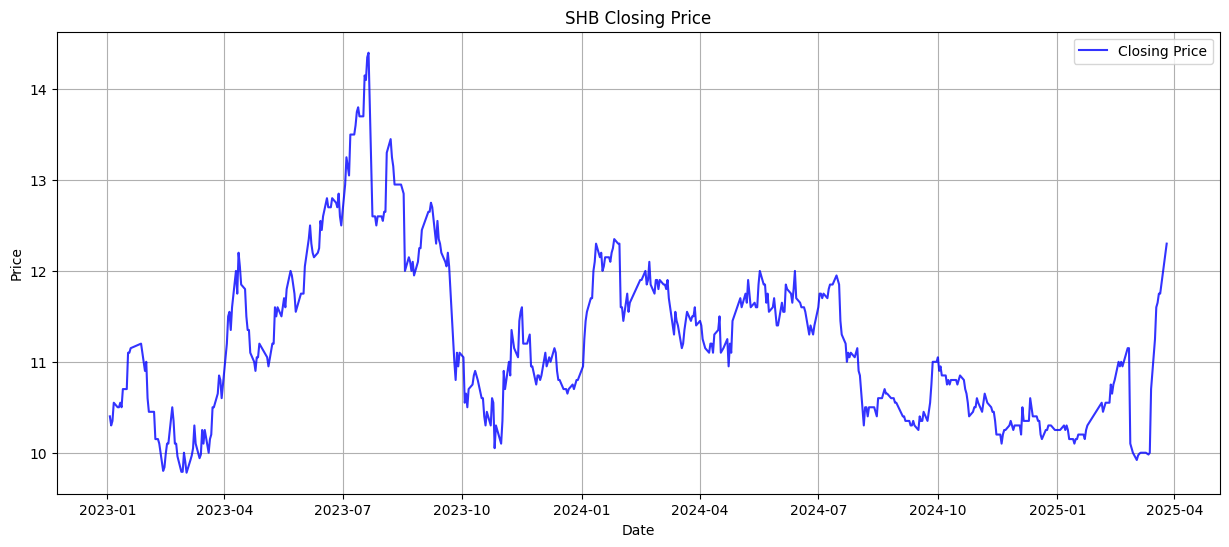

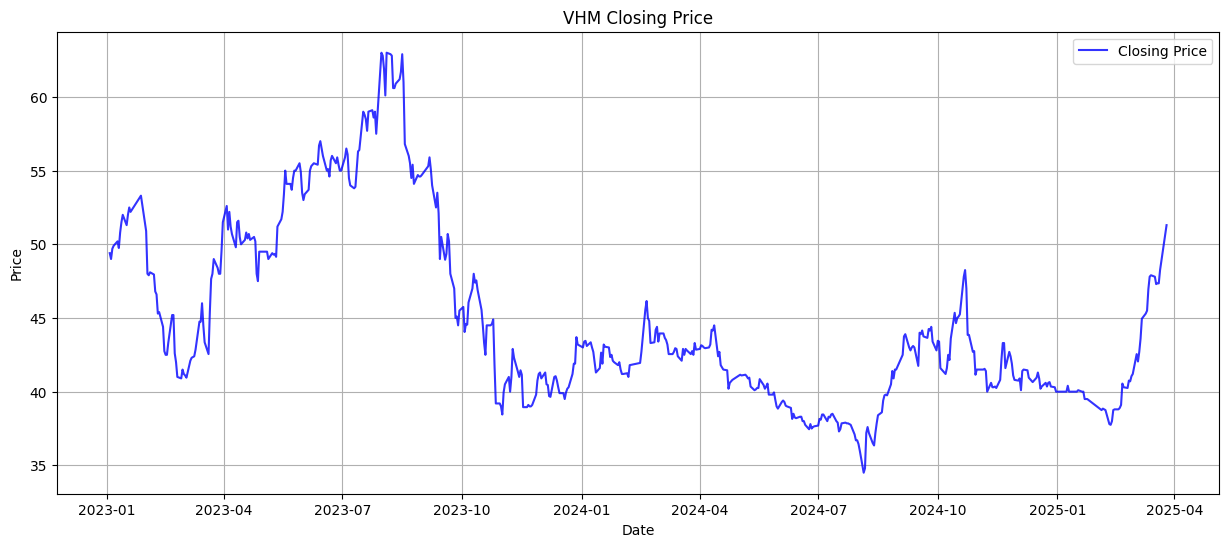

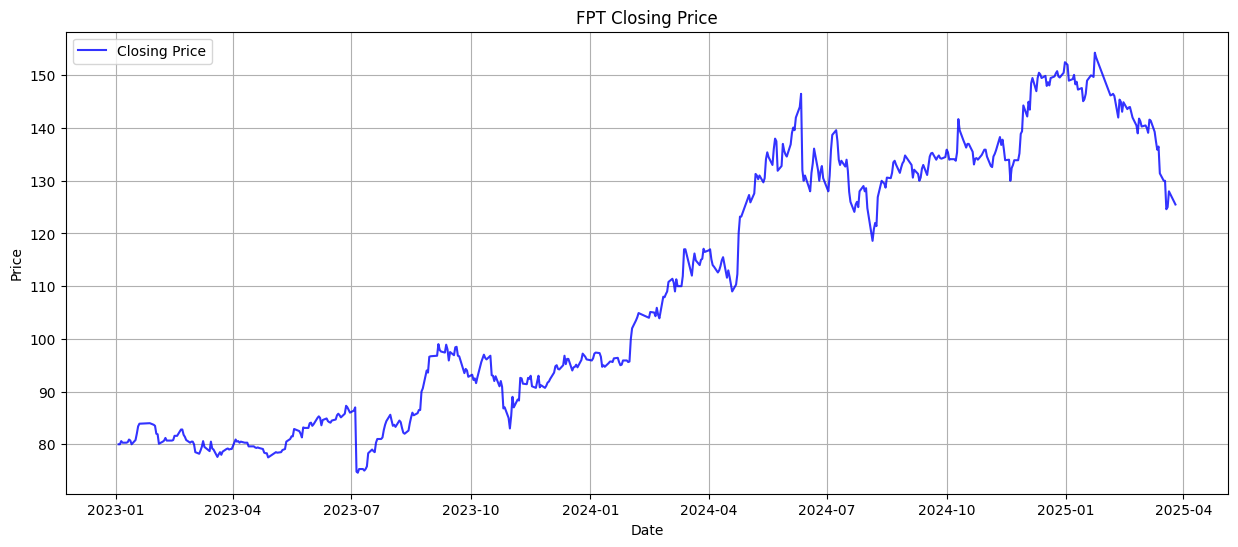

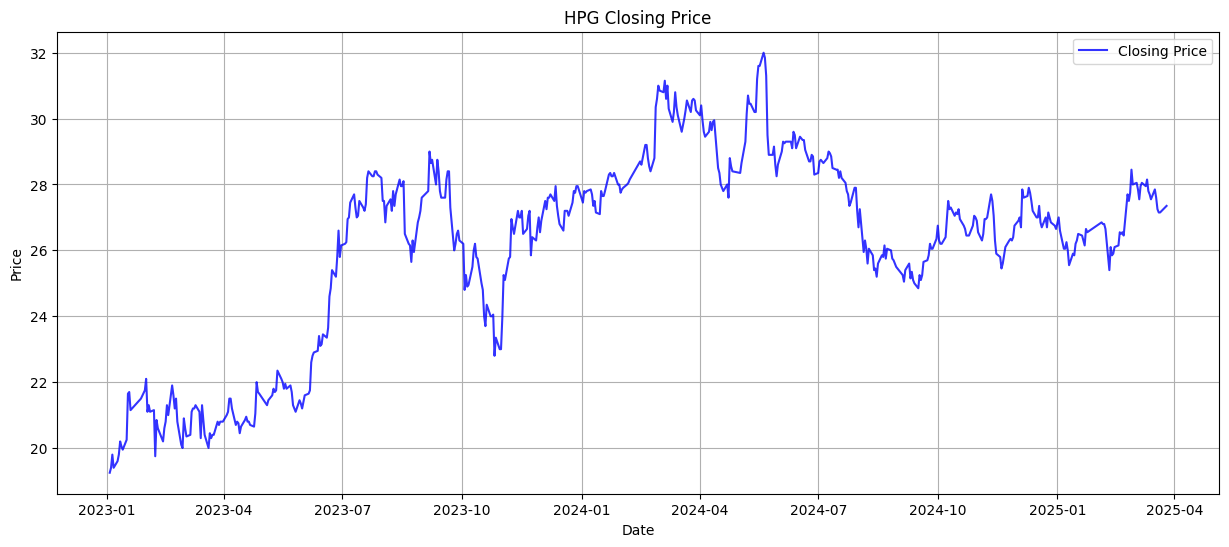

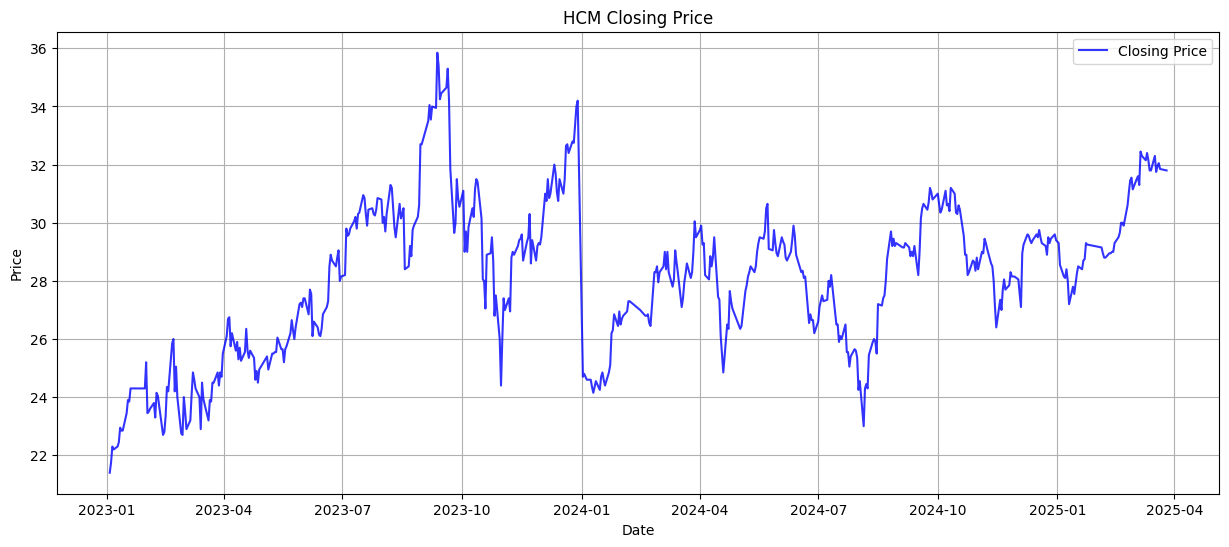

In [79]:
def plot_price_trend(df, symbol):
    """Plot Closing Price & SMA from a given start date."""
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.8)
    plt.title(f"{symbol} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
plot_price_trend(df_shb,"SHB")
plot_price_trend(df_vhm,"VHM")
plot_price_trend(df_fpt,"FPT")
plot_price_trend(df_hpg,"HPG")
plot_price_trend(df_hcm,"HCM")


In [80]:
def stock_info(df):
  print (df.info())
  print (df.isnull().sum())

stock_info(df_shb)
stock_info(df_vhm)
stock_info(df_fpt)
stock_info(df_hpg)
stock_info(df_hcm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2025-03-26 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          551 non-null    object 
 1   high          551 non-null    float64
 2   low           551 non-null    float64
 3   open          551 non-null    float64
 4   close         551 non-null    float64
 5   adjust        551 non-null    float64
 6   volume_match  551 non-null    float64
 7   value_match   551 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.7+ KB
None
Attributes
code            0
high            0
low             0
open            0
close           0
adjust          0
volume_match    0
value_match     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2025-03-26 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code   

# **PREPARE FOR TRAINING XGB MODEL**





In [81]:
df_shb = df_shb.sort_index()
df_vhm = df_vhm.sort_index()
df_fpt = df_fpt.sort_index()
df_hpg = df_hpg.sort_index()
df_hcm = df_hcm.sort_index()

In [82]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
def train_xgboost(df, test_size=0.2, cv_folds=3, **hyperparams):
    df = df.copy()
    df.drop(columns=['code'], inplace=True, errors='ignore')

    X = df.drop(columns=['close'])
    y = df['close']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **hyperparams)

    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

    # Visualize actual and predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Actual vs Predicted Prices')
    plt.show()

    # Predict next 7 days
    future_dates = pd.date_range(start=y_test.index[-1], periods=8, freq='B')[1:]
    last_known_features = X.iloc[-1].values.reshape(1, -1)

    future_predictions = []
    for _ in range(7):
        future_price = model.predict(last_known_features)[0]
        future_predictions.append(future_price)
        last_known_features = np.roll(last_known_features, -1)
        last_known_features[0, -1] = future_price  # Add new predicted value

    print("\nFuture 7-day predictions:")
    for date, price in zip(future_dates, future_predictions):
        print(f"{date.date()}: {price:.4f}")

## **Train XGBoost with SHB**

Training model for SHB...
Model Evaluation:
MAE: 0.0760
MSE: 0.0110
RMSE: 0.1051
R2 Score: 0.9344


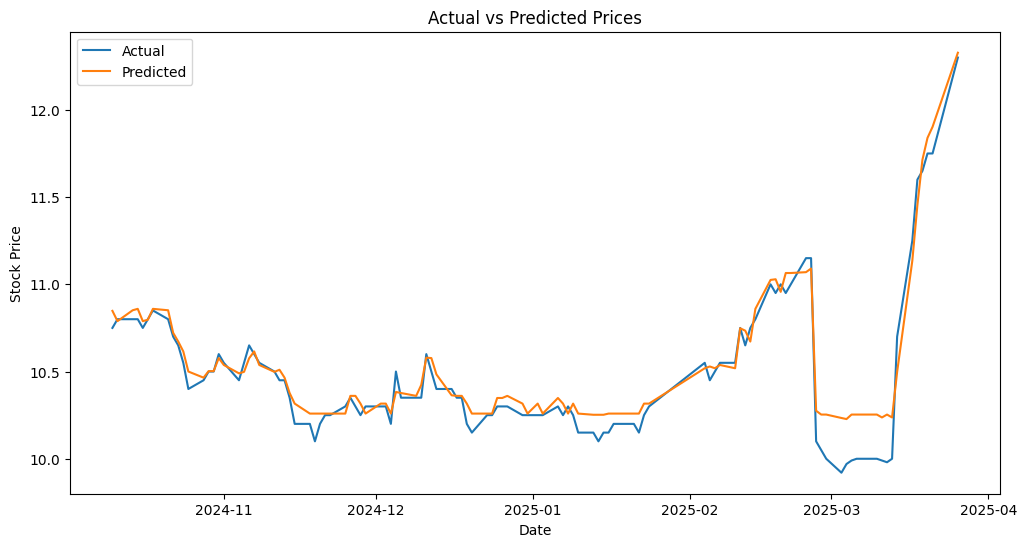


Future 7-day predictions:
2025-03-27: 12.3275
2025-03-28: 12.3700
2025-03-31: 12.3349
2025-04-01: 12.8452
2025-04-02: 13.9643
2025-04-03: 13.2596
2025-04-04: 12.3397


In [84]:
df_shb_hyperparams = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'min_child_weight': 3,
    'reg_alpha': 0.01,
    'reg_lambda': 0.1
}

print("Training model for SHB...")
train_xgboost(df_shb, **df_shb_hyperparams)

## **Train XGBoost with VHM**

Training model for VHM...
Model Evaluation:
MAE: 0.0760
MSE: 0.0110
RMSE: 0.1051
R2 Score: 0.9344


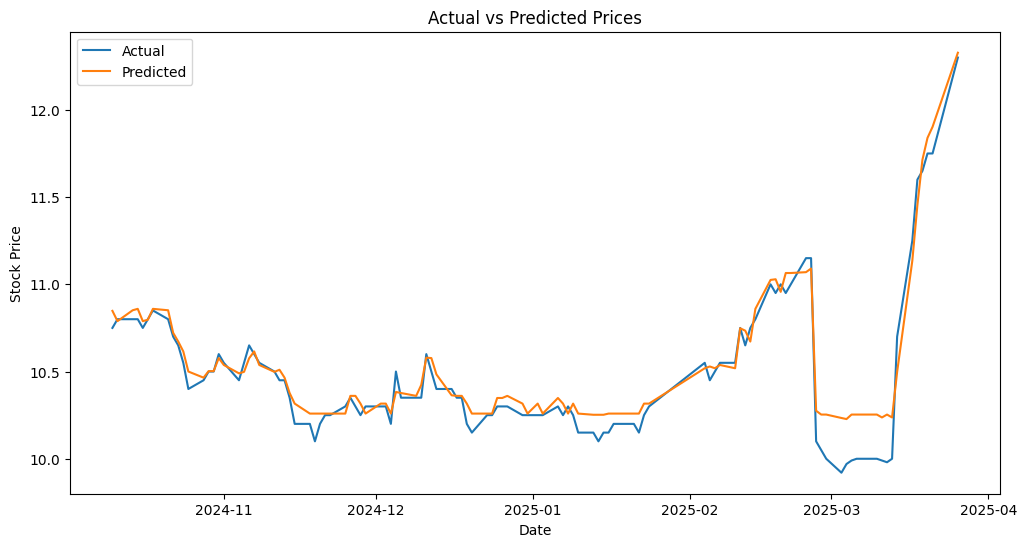


Future 7-day predictions:
2025-03-27: 12.3275
2025-03-28: 12.3700
2025-03-31: 12.3349
2025-04-01: 12.8452
2025-04-02: 13.9643
2025-04-03: 13.2596
2025-04-04: 12.3397


In [85]:
df_vhm_hyperparams = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'min_child_weight': 3,
    'reg_alpha': 0.01,
    'reg_lambda': 0.1
}

print("Training model for VHM...")
train_xgboost(df_shb, **df_vhm_hyperparams)

## **Train XGBoost with FPT**

Training model for FPT...
Model Evaluation:
MAE: 3.0848
MSE: 19.6882
RMSE: 4.4371
R2 Score: 0.6018


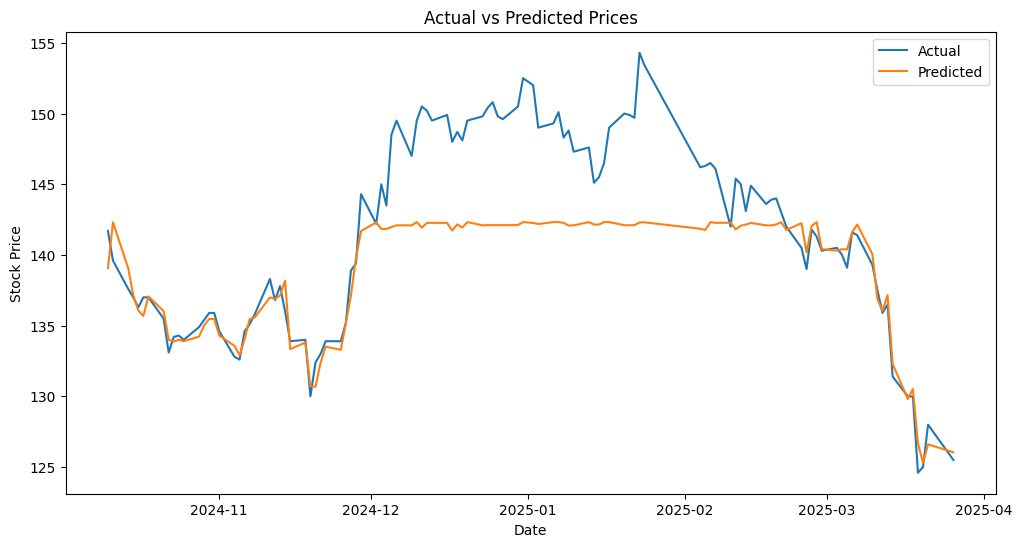


Future 7-day predictions:
2025-03-27: 126.0420
2025-03-28: 126.9125
2025-03-31: 127.2989
2025-04-01: 133.0636
2025-04-02: 140.5479
2025-04-03: 134.2933
2025-04-04: 127.9387


In [86]:
df_fpt_hyperparams = {
   'n_estimators': 200,
    'learning_rate': 0.03,
    'max_depth': 6,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'gamma': 0.2,
    'min_child_weight': 4,
    'reg_alpha': 0.05,
    'reg_lambda': 0.5,
}

print("Training model for FPT...")
train_xgboost(df_fpt, **df_fpt_hyperparams)

## **Train XGBoost with HPG**

Training model for HPG...
Model Evaluation:
MAE: 0.1664
MSE: 0.0474
RMSE: 0.2177
R2 Score: 0.8936


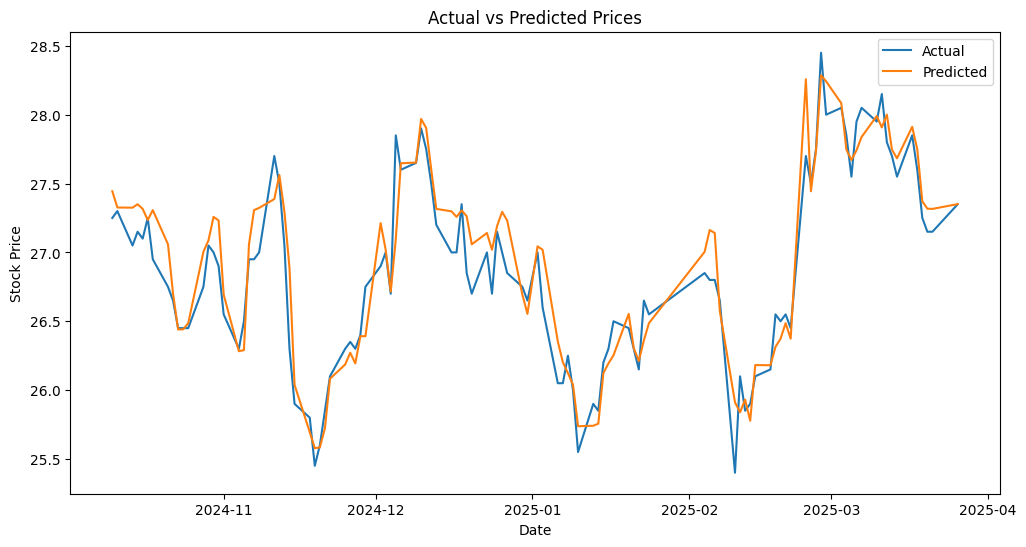


Future 7-day predictions:
2025-03-27: 27.3508
2025-03-28: 27.3462
2025-03-31: 27.5193
2025-04-01: 28.4536
2025-04-02: 30.7002
2025-04-03: 29.7165
2025-04-04: 27.3634


In [87]:
df_hpg_hyperparams = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'min_child_weight': 3,
    'reg_alpha': 0.01,
    'reg_lambda': 0.1
}

print("Training model for HPG...")
train_xgboost(df_hpg, **df_hpg_hyperparams)

## **Train XGBoost with HCM**

Training model for HCM...
Model Evaluation:
MAE: 0.2541
MSE: 0.1000
RMSE: 0.3163
R2 Score: 0.9499


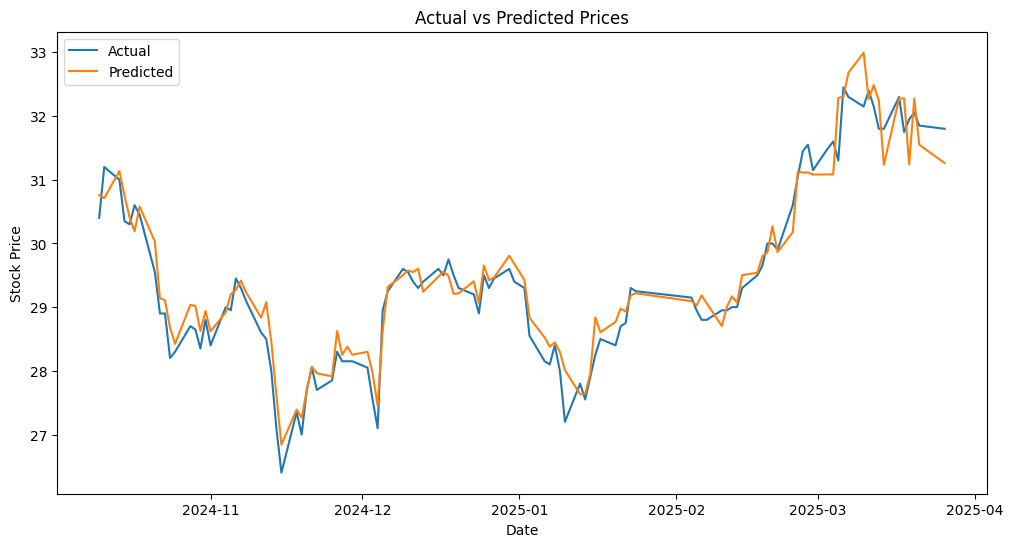


Future 7-day predictions:
2025-03-27: 31.2617
2025-03-28: 31.2738
2025-03-31: 31.3509
2025-04-01: 32.3386
2025-04-02: 34.9001
2025-04-03: 33.7164
2025-04-04: 31.0386


In [88]:
df_hcm_hyperparams = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'min_child_weight': 3,
    'reg_alpha': 0.01,
    'reg_lambda': 0.1
}

print("Training model for HCM...")
train_xgboost(df_hcm, **df_hcm_hyperparams)